## Auto Encoders

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [3]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [4]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


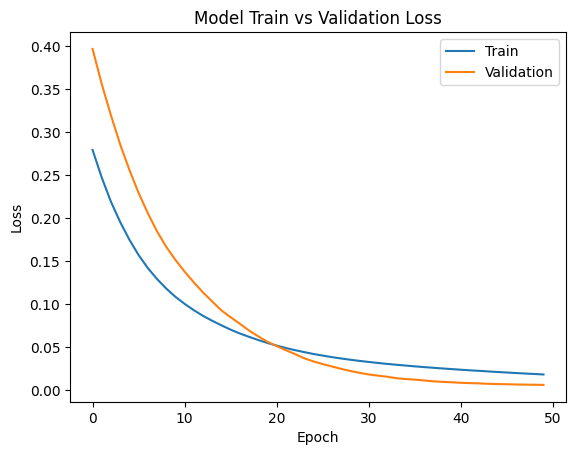

5/5 [==============================] - 0s 3ms/step


In [5]:


# Set the size of the encoded representations


#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim=X_scaled.shape[1]
encoding_dim=2
input_img=Input(shape=(input_dim,))
encoded=Dense(encoding_dim,activation='linear')(input_img)
decoded=Dense(input_dim,activation='linear')(encoded)
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse')
print(autoencoder.summary())


# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=8, shuffle=True, validation_split=0.1, verbose=0)

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Use the encoded layer to encode the training input
encoded_data = autoencoder.predict(X_scaled)


5/5 [==============================] - 0s 3ms/step


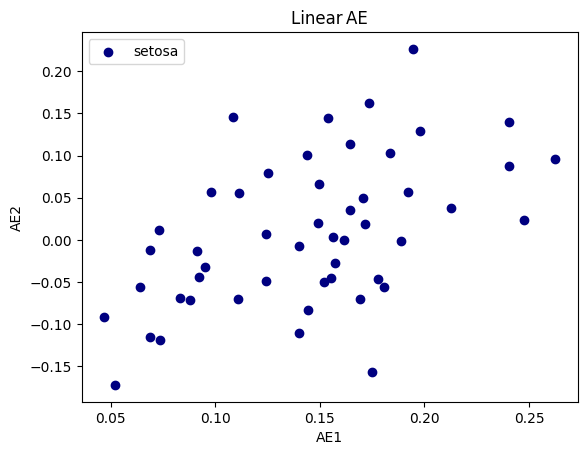

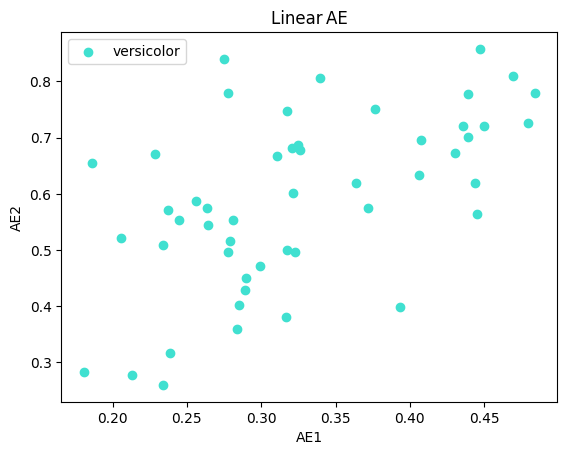

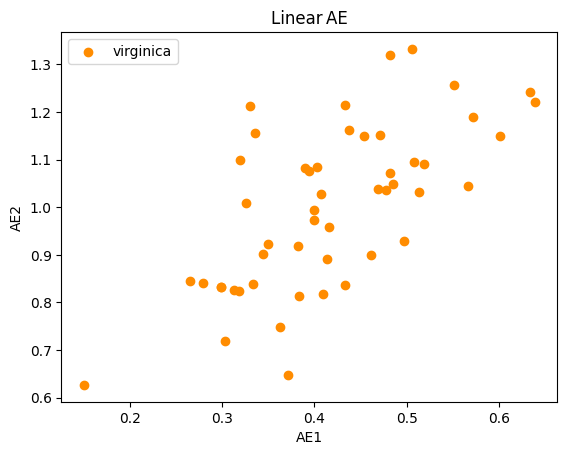

In [6]:
# use our encoded layer to encode the training input
encoder=Model(input_img,encoded)
encoded_input=Input(shape=(encoding_dim,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))
encoded_data=encoder.predict(X_scaled)
plot3clusters(encoded_data[:,:2],'Linear AE','AE')

5/5 [==============================] - 0s 4ms/step


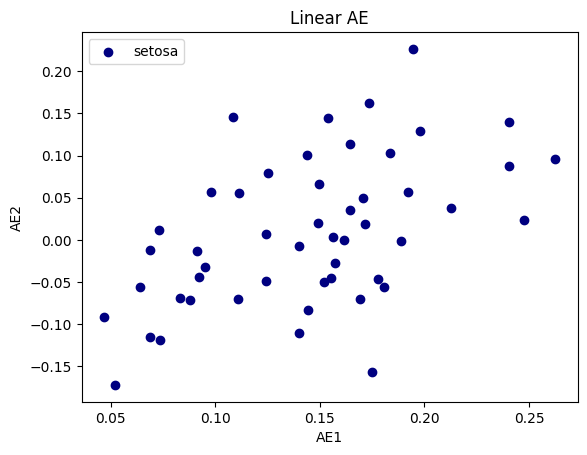

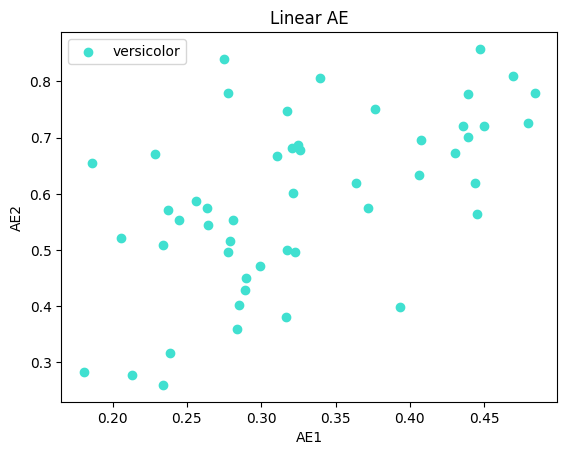

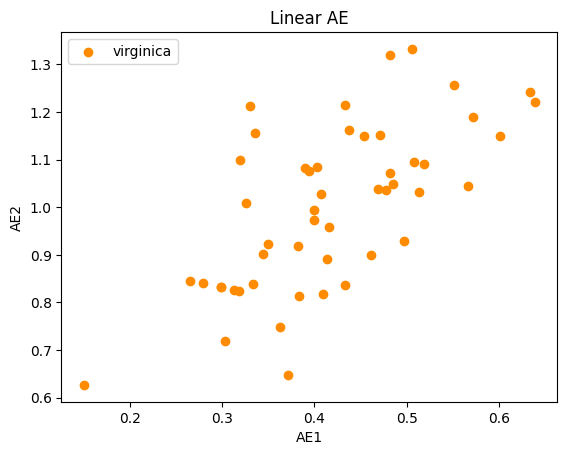

In [10]:
# shorter form

# Use the encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_data = encoder.predict(X_scaled)

# Plot clusters in 2D space
plot3clusters(encoded_data[:,:2], 'Linear AE', 'AE')



In [ ]:



# "encoded" representation of the input
encoded = None

# "decoded" lossy reconstruction of the input
decoded = None

# Map an input to reconstruction
autoencoder = None

history = None


# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()


# Use the encoded layer to encode the training input



AttributeError: ignored